Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

Based on the dataset we will create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [239]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [240]:
df=pd.read_csv("insurance_fraud.csv")

In [241]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [242]:
df.shape

(1000, 40)

There are 1000 rows and 40 columns

In [243]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [244]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

No null values present

In [245]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [246]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

The dataset has 247 fraud cases reported and 753 genuine cases in target column.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

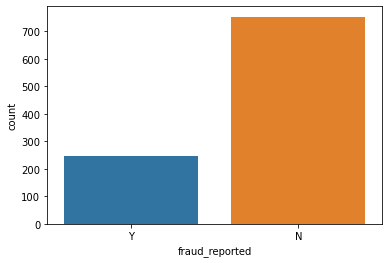

In [247]:
sb.countplot(df['fraud_reported'])

This is an imbalanced dataset.

In [248]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [249]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [250]:
#numbers of each categories in a particular column
df['collision_type'].value_counts() 

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

There are 178 rows where column has "?",which will be replaced later.

In [251]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

There are 360 rows where column has "?",which will be replaced later.

In [252]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

There are 343 rows where column has "?",which will be replaced later.

In [253]:
df['collision_type']=df['collision_type'].replace('?',np.nan)
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])

Replacing the ? with mode.

In [254]:
df['police_report_available']=df['police_report_available'].replace('?','U')

since the number of rows with ? were more we have created a unique category"U" 

In [255]:
df['property_damage']=df['property_damage'].replace('?','U')

since the number of rows with ? were more we have created a unique category"U"

In [256]:
df['collision_type'].value_counts() 

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [257]:
df['property_damage'].value_counts()

U      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [258]:
df['police_report_available'].value_counts()

U      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [259]:
df.drop(['_c39','policy_number','incident_location'], axis=1, inplace=True)

unnecessary column were dropped

In [260]:
df.shape

(1000, 37)

In [261]:
# converting date dtype into datetime and then splitting it into month and year
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [262]:
df['policy_year']=df['policy_bind_date'].dt.year

In [263]:
df['policy_month']=df['policy_bind_date'].dt.month

In [264]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_year,policy_month
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,2014,10
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,2006,6
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,6
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,5
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,2014,6


In [265]:
df.drop('policy_bind_date',axis=1,inplace=True)

In [266]:
df['policy_year'].value_counts()

1991    55
2002    50
1992    48
1990    48
1997    44
2014    43
2009    43
1996    43
1994    41
2006    41
2001    41
2007    40
2005    40
1999    40
1995    39
2010    38
2003    37
2004    36
2012    36
2013    35
1993    33
2008    33
2011    32
2000    31
1998    30
2015     3
Name: policy_year, dtype: int64

In [267]:
df['fraud_reported']=df['fraud_reported'].replace('Y',1)
df['fraud_reported']=df['fraud_reported'].replace('N',0)

y and N category were replaced by 1 and 0 resp.

In [268]:
df['fraud_reported'].head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [269]:
df.drop('insured_zip',axis = 1, inplace=True)

In [270]:
# converting date dtype into datetime and then splitting it into month and year in column'incident_date
df['incident_date']=pd.to_datetime(df['incident_date'])

In [271]:
df['incident_month']=df['incident_date'].dt.month

In [272]:
df['incident_month']=df['incident_date'].dt.month

In [273]:
df.drop('incident_date',axis = 1, inplace=True)# dropping the original column as it was no more reqd

# Graphical analysis

In [274]:
df.select_dtypes(include='object').columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

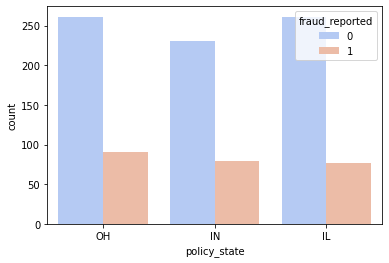

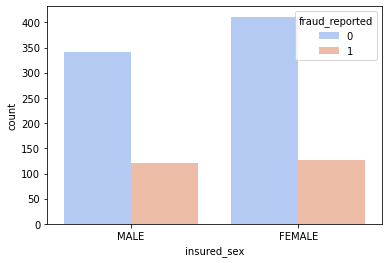

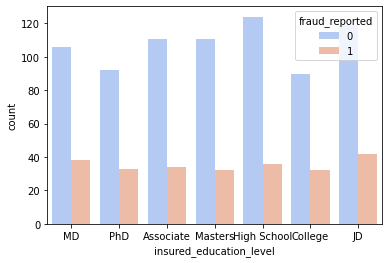

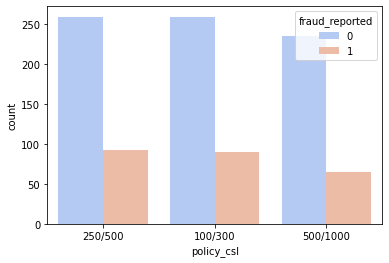

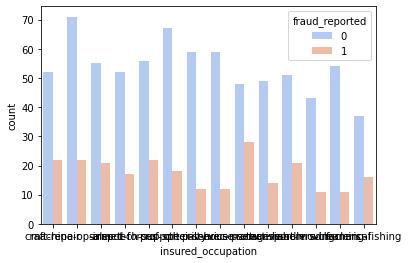

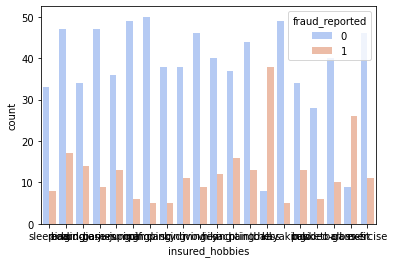

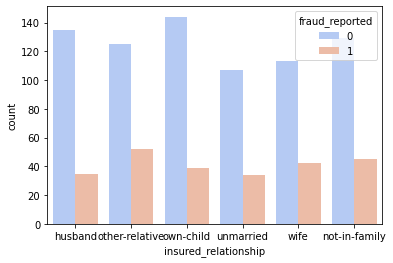

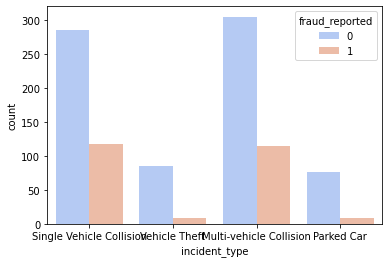

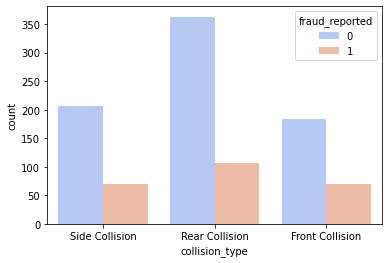

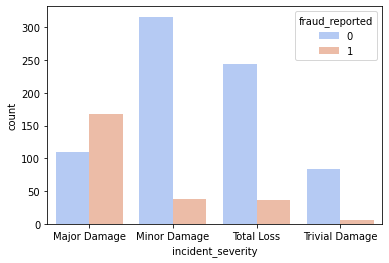

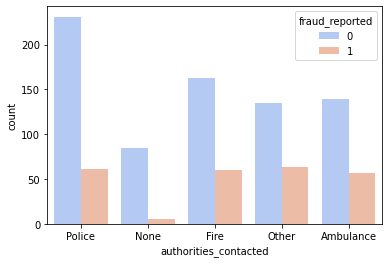

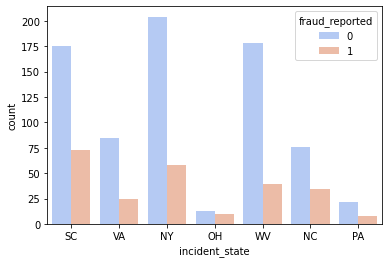

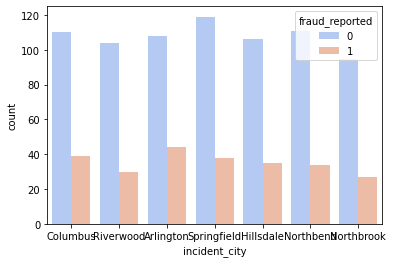

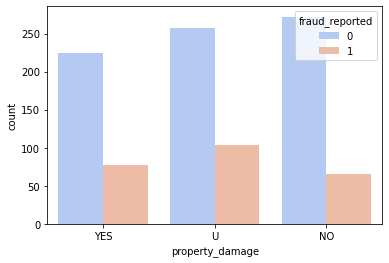

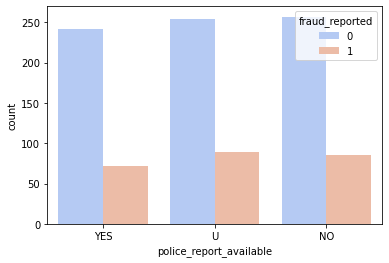

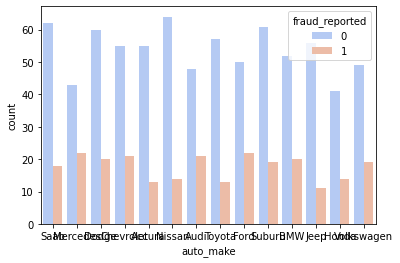

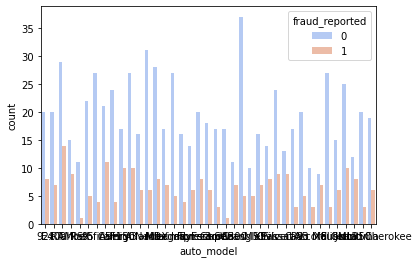

In [275]:
columns=['policy_state', 'insured_sex', 'insured_education_level','policy_csl',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model']
for i in columns:
    plt.figure(i)
    sb.countplot(df[i], palette='coolwarm', hue='fraud_reported',data=df);

All three state have almost same number of fraudulent cases.more Female customer were there as compared to male.However percentage offraud cases were more observed in males.Fraud cases were least reported in parked car as compared to single and multi vehicle collision. Rear collision was most frequent.Fraud cases were more observed when there was major damage seen.Most fraud cases were seen in the state of SC.  

In [276]:
df.select_dtypes(include=['int64','float64']).columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'policy_year', 'policy_month',
       'incident_month'],
      dtype='object')

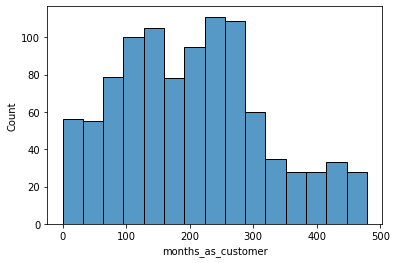

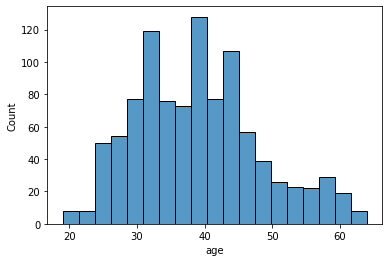

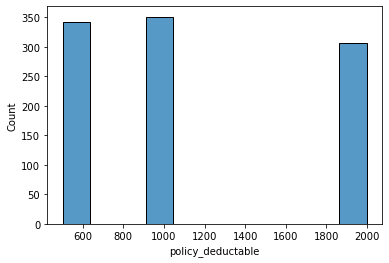

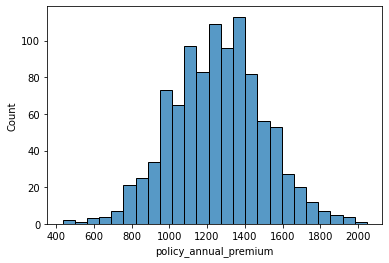

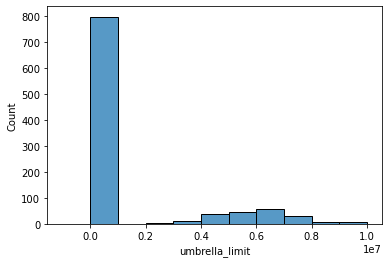

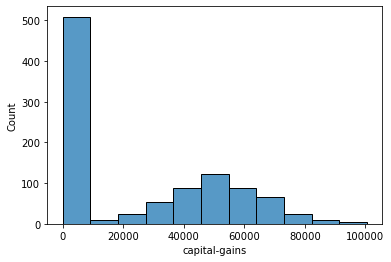

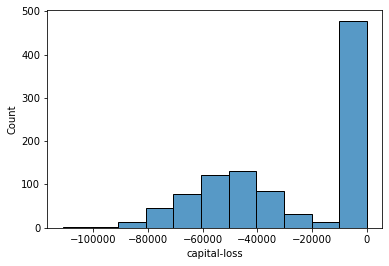

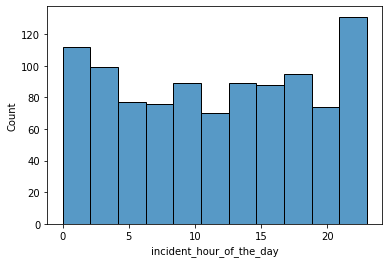

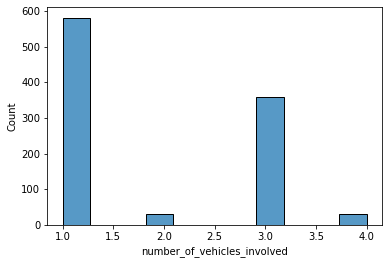

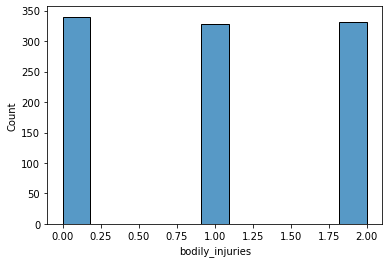

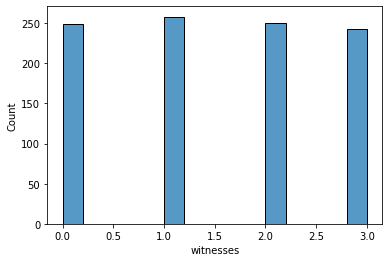

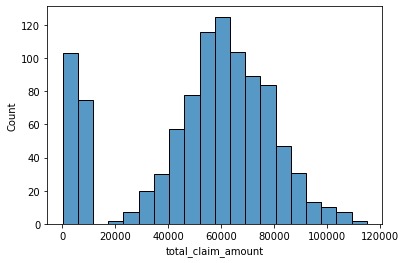

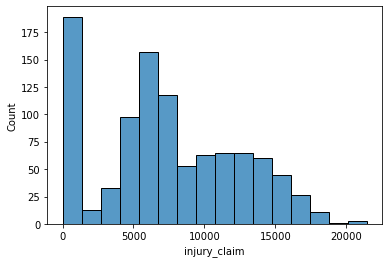

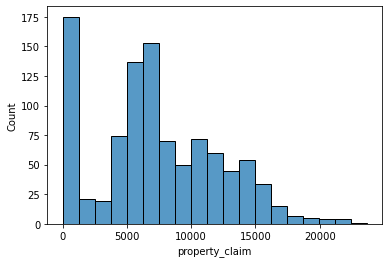

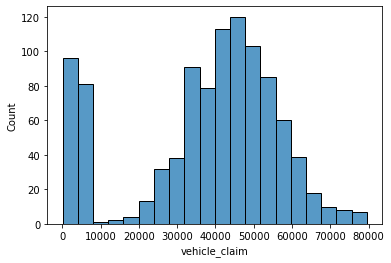

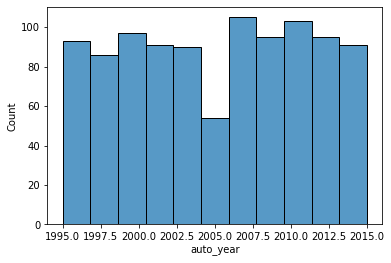

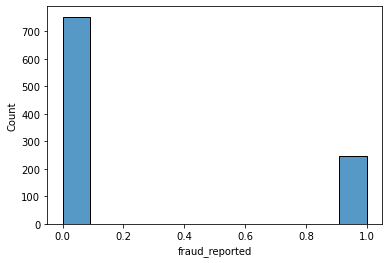

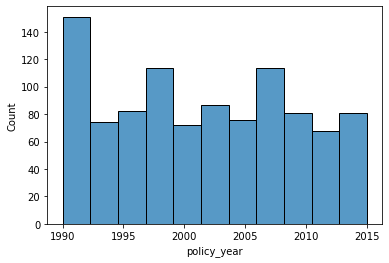

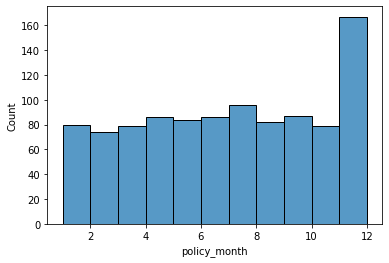

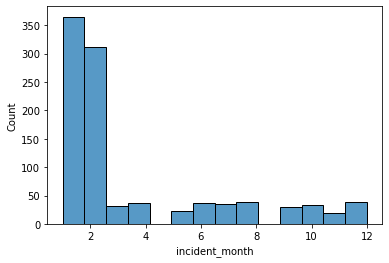

In [277]:
numerical_features=['months_as_customer', 'age','policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'policy_year', 'policy_month',
       'incident_month']
for i in df[numerical_features]:
    plt.figure()
    sb.histplot(df[i])

The age group of customer ranged from 20-60,however maximum customer had the age of 40 yrs.Maximum premium ranged from 1200-1400 dollrs.in most of the cases only one vehicle was involved.

In [278]:
pd.crosstab(df['auto_model'],df['fraud_reported'])

fraud_reported,0,1
auto_model,,
3 Series,17,1
92x,20,8
93,20,5
95,22,5
A3,27,10
A5,21,11
Accord,10,3
C300,11,7
CRV,17,3


In [279]:
df.groupby('auto_model').mean()['fraud_reported'].reset_index()

,auto_model,fraud_reported
0,3 Series,0.055556
1,92x,0.285714
2,93,0.200000
3,95,0.185185
4,A3,0.270270
5,A5,0.343750
6,Accord,0.230769
7,C300,0.388889
8,CRV,0.150000
9,Camry,0.142857


model X6 has the highest percentage of fraud case reported.

# boxplot for outliers

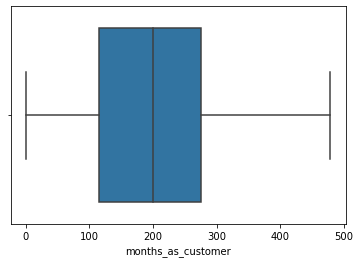

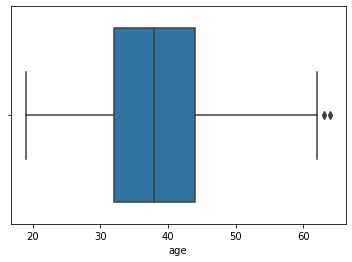

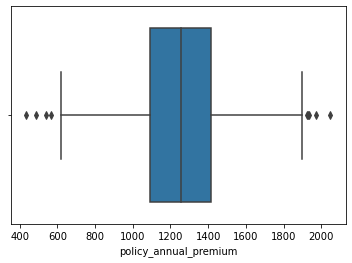

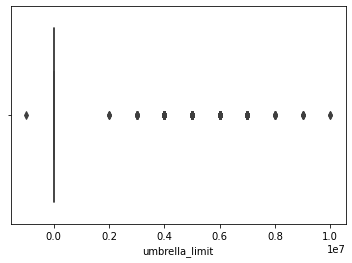

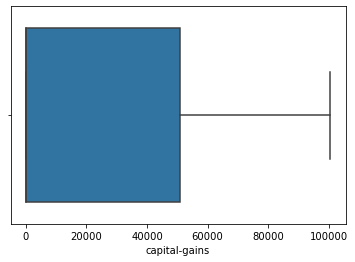

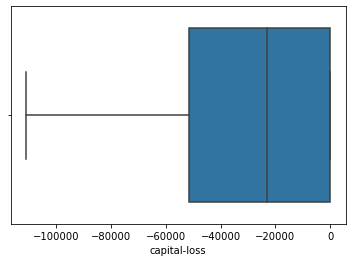

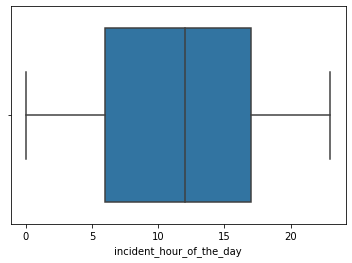

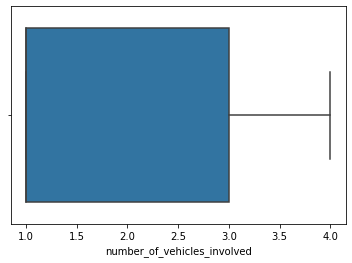

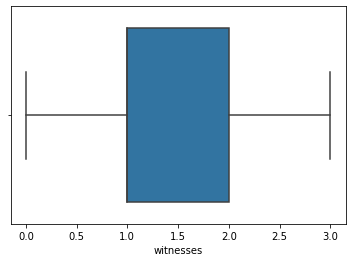

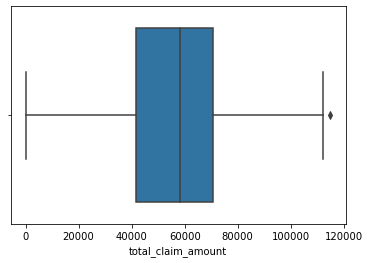

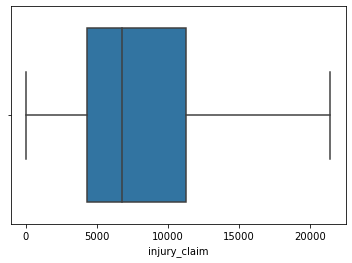

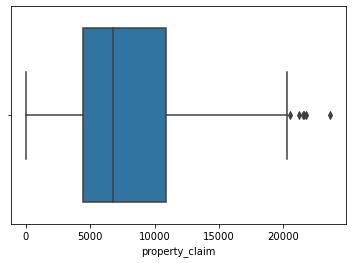

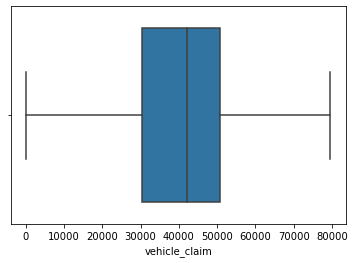

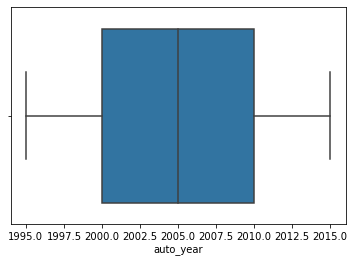

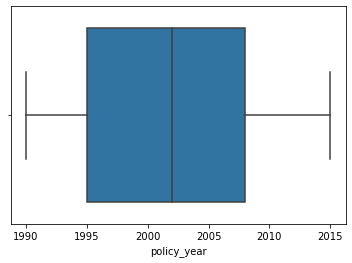

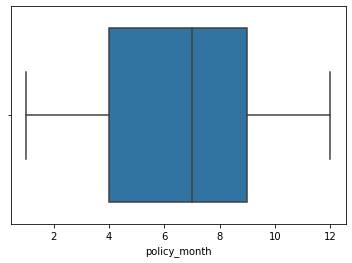

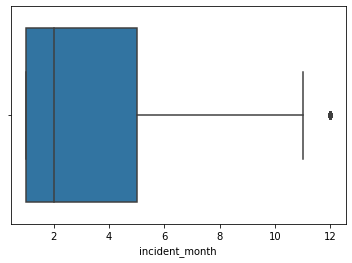

In [280]:
numerical_features=['months_as_customer', 'age',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'policy_year', 'policy_month',
       'incident_month']
for i in df[numerical_features]:
    plt.figure()
    sb.boxplot(df[i])

# transforming categorical to numerical values

In [281]:
from sklearn.preprocessing import LabelEncoder

In [282]:
le=LabelEncoder()

In [283]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [284]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_year,policy_month,incident_month
0,328,48,2,1,1000,1406.91,0,1,4,2,...,6510,13020,52080,10,1,2004,1,2014,10,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,780,780,3510,8,12,2007,1,2006,6,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,7700,3850,23100,4,30,2007,0,2000,6,2
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,6340,6340,50720,3,34,2014,1,1990,5,10
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,1300,650,4550,0,31,2009,0,2014,6,2


# multivariate analysis

In [285]:
#correlation
cor=df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

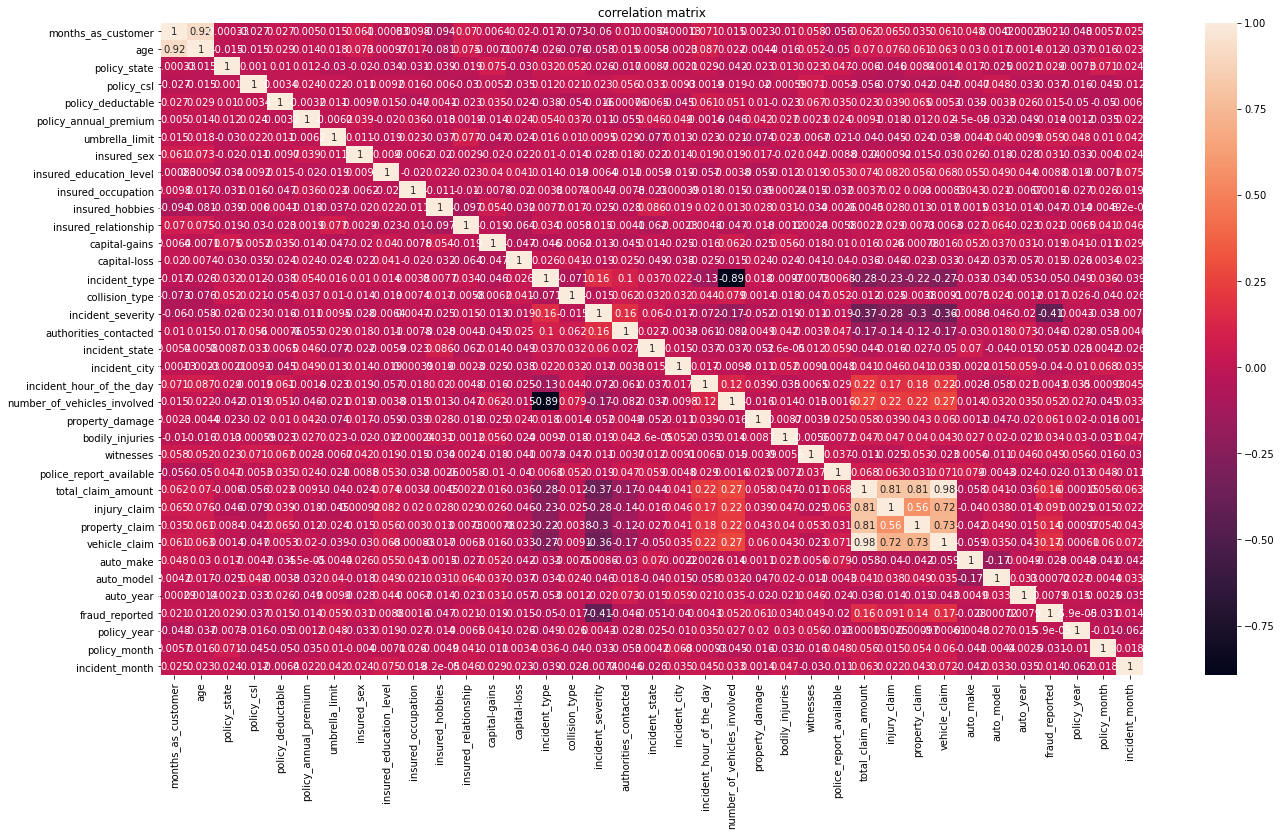

In [286]:
plt.figure(figsize=[22,12])
sb.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show

heat map shows positive relation between total_clain,vehicle_claim,injury claim and property claim

In [287]:
cor['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
property_damage                0.060616
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
policy_deductable              0.014817
incident_month                 0.014495
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
policy_year                   -0.000059
policy_annual_premium         -0.014480
capital-loss                  -0.014863


fraud cases were positively correlated to vehicle_claim, total_claim_amount  and property_claim

# outlier removal

In [288]:
from scipy.stats import zscore

In [289]:
z=np.abs(zscore(df))

In [290]:
new_df=df[(z<3).all(axis=1)]

In [291]:
new_df.shape

(980, 37)

In [292]:
df.shape

(1000, 37)

In [293]:
y=new_df["fraud_reported"]
x=new_df.drop("fraud_reported",axis=1)

In [294]:
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_year,policy_month,incident_month
0,328,48,2,1,1000,1406.91,0,1,4,2,...,71610,6510,13020,52080,10,1,2004,2014,10,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,5070,780,780,3510,8,12,2007,2006,6,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,34650,7700,3850,23100,4,30,2007,2000,6,2
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,63400,6340,6340,50720,3,34,2014,1990,5,10
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,6500,1300,650,4550,0,31,2009,2014,6,2


In [295]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [296]:
x.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.058818
bodily_injuries                0.003757
witnesses                      0.026211


# normalisation

In [297]:
from sklearn.preprocessing import MinMaxScaler

In [298]:
scale=MinMaxScaler()
df2=scale.fit_transform(x)

In [299]:
df2=pd.DataFrame(df2,columns=x.columns)

In [300]:
x=df2

In [301]:
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_year,policy_month,incident_month
0,0.684760,0.644444,1.0,0.5,0.333333,0.606891,0.125,1.0,0.666667,0.153846,...,0.622801,0.303497,0.596974,0.654296,0.769231,0.026316,0.45,0.96,0.818182,0.000000
1,0.475992,0.511111,0.5,0.5,1.000000,0.460404,0.750,1.0,0.666667,0.461538,...,0.043285,0.036364,0.035763,0.043276,0.615385,0.315789,0.60,0.64,0.454545,0.000000
2,0.279749,0.222222,1.0,0.0,1.000000,0.611243,0.750,0.0,1.000000,0.846154,...,0.300906,0.358974,0.176525,0.289722,0.307692,0.789474,0.60,0.40,0.454545,0.090909
3,0.534447,0.488889,0.0,0.5,1.000000,0.613059,0.875,0.0,1.000000,0.076923,...,0.551298,0.295571,0.290692,0.637187,0.230769,0.894737,0.95,0.00,0.363636,0.818182
4,0.475992,0.555556,0.0,1.0,0.333333,0.730541,0.875,1.0,0.000000,0.846154,...,0.055739,0.060606,0.029803,0.056359,0.000000,0.815789,0.70,0.96,0.454545,0.090909


In [302]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# random over sampling

In [303]:
from imblearn.over_sampling import RandomOverSampler

In [304]:
ros=RandomOverSampler(1)

In [305]:
x_res,y_res=ros.fit_resample(x,y)

In [306]:
from collections import Counter

In [307]:
print(sorted(Counter(y).items()))

[(0, 740), (1, 240)]


In [308]:
print(sorted(Counter(y_res).items()))

[(0, 740), (1, 740)]


In [309]:
#train test split
x_train_res,x_test_res,y_train_res,y_test_res=train_test_split(x_res,y_res,test_size=0.30,random_state=22)

# model building

In [310]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
for m in model:
    m.fit(x_train_res,y_train_res)
    m.score(x_train_res,y_train_res)
    predm=m.predict(x_test_res)
    print(accuracy_score(y_test_res,predm))
    print(confusion_matrix(y_test_res,predm))
    print(classification_report(y_test_res,predm))
    print('\n')

0.7522522522522522
[[169  51]
 [ 59 165]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       220
           1       0.76      0.74      0.75       224

    accuracy                           0.75       444
   macro avg       0.75      0.75      0.75       444
weighted avg       0.75      0.75      0.75       444



0.9144144144144144
[[186  34]
 [  4 220]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       220
           1       0.87      0.98      0.92       224

    accuracy                           0.91       444
   macro avg       0.92      0.91      0.91       444
weighted avg       0.92      0.91      0.91       444



0.7972972972972973
[[174  46]
 [ 44 180]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       220
           1       0.80      0.80      0.80       224

    accuracy                           0.80       44

# cross validation

In [311]:
from sklearn.model_selection import cross_val_score

In [312]:
lg=LogisticRegression()
print (cross_val_score(lg,x_res,y_res,cv=5).mean())
dtc=DecisionTreeClassifier()
print (cross_val_score(dtc,x_res,y_res,cv=5).mean())
svc=SVC()
print (cross_val_score(svc,x_res,y_res,cv=5).mean())
rfc=RandomForestClassifier()
print (cross_val_score(rfc,x_res,y_res,cv=5).mean())

0.7371621621621622
0.893918918918919
0.8222972972972972
0.9263513513513513


random forest classifier had the least difference in accuracy score and CV score.also the FP and FN were least in that.So we will proceed with random forest

# hyperparameter tuning

In [313]:
from sklearn.model_selection import RandomizedSearchCV

In [314]:
rfc=RandomForestClassifier()

In [315]:
n_estimators= [100,200,400,500,800,1000]
max_features= ['auto','sqrt','log2']
min_samples_split= [2,4,5,7,10]
min_samples_leaf= [1,2,5,7,9]
criterion=['gini','entropy']

In [316]:
params={'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'criterion':criterion}

In [317]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = params, n_iter = 100, cv = 3, verbose=2,scoring='accuracy', random_state=22, n_jobs = -1)

In [318]:
rf_random.fit(x_train_res,y_train_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 7, 9],
                                        'min_samples_split': [2, 4, 5, 7, 10],
                                        'n_estimators': [100, 200, 400, 500,
                                                         800, 1000]},
                   random_state=22, scoring='accuracy', verbose=2)

In [319]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'criterion': 'entropy'}

# final model with best parameter

In [324]:
Final_model=RandomForestClassifier(n_estimators= 100, min_samples_split=4, min_samples_leaf=2, max_features='sqrt',criterion = 'entropy')
Final_model.fit(x_train_res,y_train_res)
pred=Final_model.predict(x_test_res)
acc=accuracy_score(y_test_res,pred)
print(acc)
print(confusion_matrix(y_test_res,pred))
print(classification_report(y_test_res,pred))

0.9211711711711712
[[190  30]
 [  5 219]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.92       220
           1       0.88      0.98      0.93       224

    accuracy                           0.92       444
   macro avg       0.93      0.92      0.92       444
weighted avg       0.93      0.92      0.92       444



# saving the model

In [325]:
import joblib

In [326]:
filename='finalinsurancemodel.pkl'

In [327]:
joblib.dump(Final_model,'finalinsurancemodel.pkl')

['finalinsurancemodel.pkl']